In [1]:
%matplotlib inline 
%reload_ext autoreload
%autoreload 2

In [2]:
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.family'] = 'Arial'

In [3]:
import os

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

from scipy.stats import spearmanr

In [4]:
from access_biology_data import meta, relations, annotation, properties
from access_literature_data import medline
from access_science_shared import standardizer

import sys
sys.path.append('./../src/')
from aging_tools import inout, export, calculators
from access_aging_data import chaperome, earlier_studies, sequencing


In [5]:
import matplotlib
matplotlib.rcParams.update({'font.size': 10})

In [6]:
quanta = 0.05

In [7]:
save_images = True

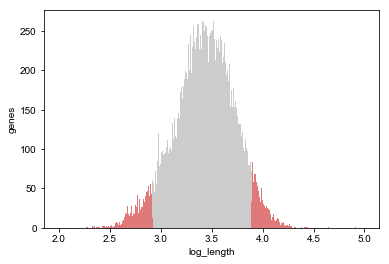

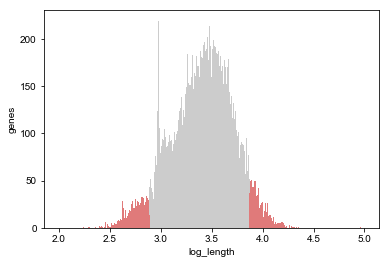

In [8]:
for taxon_id in [9606, 10090]:

    ref_genes = standardizer.reference_genes(taxon_id, 'orp')  # only consider supported protein coding-genes

    pr = properties.genbank_validated_rna(taxon_id)[[
        'gene_ncbi', 'Genbank_validated_RNA: full_SumACGT']].rename(columns={
        'Genbank_validated_RNA: full_SumACGT': 'length'
    })
    pr.loc[:, 'log_length'] = np.log10(pr['length'])
    pr = pr[pr['gene_ncbi'].isin(ref_genes)]
    pr.loc[:, 'rank'] = pr['length'].rank(pct=True)

    v = np.arange(2, 5, 0.01)

    plt.figure()
    sns.distplot(pr['log_length'],v ,kde=False, color='grey')
    sns.distplot(pr[pr['rank']<quanta]['log_length'], v, kde=False, color='red')
    sns.distplot(pr[pr['rank']>(1-quanta)]['log_length'], v,kde=False, color='red')
    plt.ylabel('genes')


    if save_images:
        export.export_image(
            '190413_visualize_transcript_length_distributions/{}.pdf'.format(
                int(taxon_id)))